In [663]:
import pandas as pd
import random
import math

In [664]:
data_path = 'spam.csv'
df = pd.read_csv(data_path, encoding='latin-1')

In [665]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5204,ham,How come she can get it? Should b quite diff t...,NaN,NaN,NaN
5305,ham,\Hi missed your Call and my mumHas beendroppin...,NaN,NaN,NaN
182,ham,ok. I am a gentleman and will treat you with d...,NaN,NaN,NaN
2245,ham,How did you find out in a way that didn't incl...,NaN,NaN,NaN
70,ham,Wah lucky man... Then can save money... Hee...,NaN,NaN,NaN


In [666]:
df.shape

(5572, 5)

## Data Cleaning

In [667]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [668]:
df.sample(5)

,v1,v2
1276,ham,Can do lor...
1282,ham,Ever green quote ever told by Jerry in cartoon...
2098,ham,"No dice, art class 6 thru 9 :( thanks though. ..."
2474,ham,"Princess, i like to make love &lt;#&gt; time..."
4110,spam,URGENT! Your Mobile number has been awarded a ...


In [669]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
3409,ham,Joy's father is John. Then John is the ____ of...
3640,spam,You can stop further club tones by replying \S...
2793,ham,"The affidavit says &lt;#&gt; E Twiggs St, di..."
3684,ham,Wake me up at &lt;#&gt; am morning:)
1054,ham,HIYA COMIN 2 BRISTOL 1 ST WEEK IN APRIL. LES G...


In [670]:
df['target'] = df['target'].map({'ham':0,'spam':1})

In [671]:
df.sample(5)

,target,text
1523,0,Yup ok thanx...
1434,0,I asked sen to come chennai and search for job.
1983,0,I wnt to buy a BMW car urgently..its vry urgen...
2548,0,Honestly i've just made a lovely cup of tea an...
3044,0,"Hello, yeah i've just got out of the bath and ..."


In [672]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [673]:
df.duplicated().sum()

403

In [674]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [675]:
df.shape

(5169, 2)

## EDA (Exploratory Data Analysis)

In [676]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [677]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [678]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

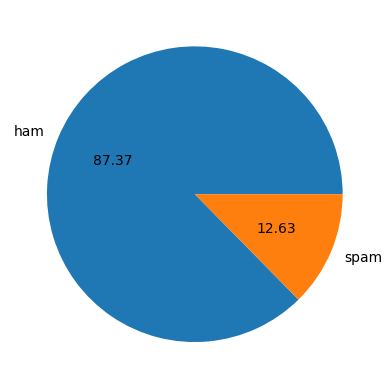

In [679]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [680]:
df['num_characters'] = df['text'].apply(len)

In [681]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [682]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [683]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [684]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
#ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [685]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


## Data Preprocessing

In [686]:
X = df[['num_characters']].values.tolist()
y = df['target'].tolist()

In [687]:
import pandas as pd
import re
import string

stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 
    'will', 'just', 'don', 'should', 'now'
])

def basic_stem(word):
    if word.endswith('ing') or word.endswith('ed'):
        return word[:-3]
    elif word.endswith('ly') or word.endswith('es'):
        return word[:-2]
    elif word.endswith('s') and len(word) > 3:
        return word[:-1]
    return word

def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    tokens = text.split()
    
    # Remove stopwords and apply stemming
    cleaned_tokens = [
        basic_stem(token) for token in tokens if token not in stopwords
    ]
    
    return " ".join(cleaned_tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

df.head()



,target,text,num_characters,num_words,num_sentences,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugi n great w...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wk comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say ear hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf liv around though


In [688]:
spam_corpus = []
for msg in df[df['target'] == 1]['cleaned_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [689]:
len(spam_corpus)

10879

In [690]:
word_count = {}

for word in spam_corpus:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

print(sorted_word_count[:30])

[('call', 320), ('free', 188), ('2', 155), ('txt', 144), ('u', 124), ('text', 121), ('ur', 119), ('mobile', 105), ('stop', 103), ('claim', 98), ('4', 97), ('rep', 93), ('prize', 81), ('new', 72), ('week', 69), ('get', 69), ('send', 59), ('won', 59), ('urgent', 58), ('nokia', 57), ('cash', 51), ('contact', 51), ('win', 49), ('service', 48), ('please', 47), ('min', 45), ('phone', 43), ('customer', 42), ('guarant', 42), ('per', 41)]


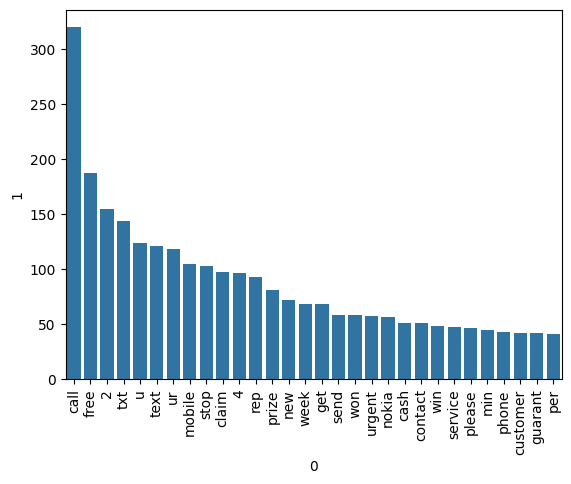

In [691]:
import seaborn as sns
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [692]:
ham_corpus = []
for msg in df[df['target'] == 0]['cleaned_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [693]:
len(ham_corpus)

37019

In [694]:
word_count = {}

for word in ham_corpus:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

print(sorted_word_count[:30])


[('u', 892), ('im', 435), ('go', 427), ('get', 307), ('2', 288), ('n', 270), ('ltgt', 254), ('ok', 246), ('dont', 242), ('know', 232), ('got', 225), ('like', 222), ('come', 208), ('good', 206), ('ill', 205), ('call', 204), ('ur', 197), ('day', 192), ('want', 182), ('time', 181), ('love', 180), ('4', 160), ('lor', 157), ('one', 155), ('home', 151), ('think', 149), ('see', 149), ('still', 141), ('r', 136), ('tell', 133)]


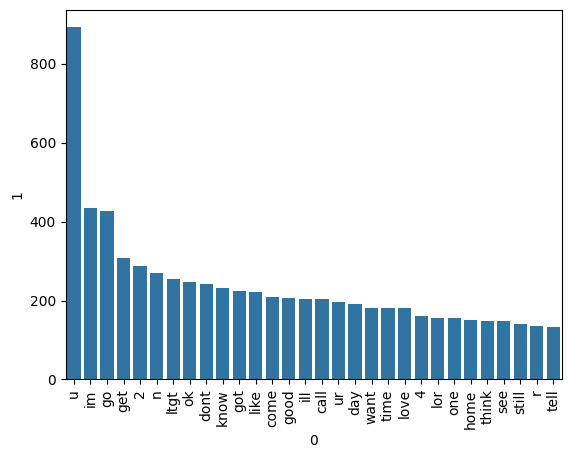

In [695]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Implementation

In [696]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [697]:
# split data into training and testing sets
split_index = int(0.8 * len(X))
train_X = X[:split_index]
train_y = y[:split_index]
test_X = X[split_index:]
test_y = y[split_index:]

In [698]:
# Trying different values of k to find the optimal one (use this loop to test several k values)
# best_k = 1
# best_accuracy = 0
# for k in range(1, 11):  # Try k values from 1 to 10
#     knc = KNeighborsClassifierScratch(k=k)
#     knc.fit(train_X, train_y)
#     accuracy = knc.score(test_X, test_y)
#     if accuracy > best_accuracy:
#         best_k = k
#         best_accuracy = accuracy

# print("Optimal value of k:", best_k)

In [ ]:
# KNeighborsClassifier implementation
class KNeighborsClassifierScratch:
    def __init__(self, k=3):
        self.k = k
        self.data = []

    def fit(self, X, y):
        self.data = list(zip(X, y))

    def _euclidean_distance(self, point1, point2):
        distance = 0.0
        for i in range(len(point1)):
            distance += (point1[i] - point2[i]) ** 2
        return math.sqrt(distance)
    
    def predict(self, X):
        predictions = []
        for test_point in X:
            distances = []
            for train_point, label in self.data:
                dist = self._euclidean_distance(test_point, train_point)
                distances.append((dist, label))
            distances.sort(key=lambda x: x[0])
            neighbors = [label for _, label in distances[:self.k]]
            prediction = max(set(neighbors), key=neighbors.count)
            predictions.append(prediction)
        return predictions

    def score(self, X, y):
        predictions = self.predict(X)
        correct = sum([1 for i in range(len(y)) if predictions[i] == y[i]])
        return correct / len(y)

knc = KNeighborsClassifierScratch(k=3)
knc.fit(train_X, train_y)
predictions = knc.predict(test_X)
accuracy = knc.score(test_X, test_y)

# Calculate precision manually
tp = sum([1 for i in range(len(test_y)) if predictions[i] == 1 and test_y[i] == 1])  # True Positives
fp = sum([1 for i in range(len(test_y)) if predictions[i] == 1 and test_y[i] == 0])  # False Positives

# Precision calculation
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0  

print("Predictions:", predictions)
print("Actual labels:", test_y)
print("Accuracy:", accuracy)
print("Precision:", precision)

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [700]:
import pickle
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(knc,open('model2.pkl','wb'))